In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [343]:
df=pd.read_csv('Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [344]:
df
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [345]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.7500,50.5000,75.250,100.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


In [346]:

# Define the number of augmented samples you want to create
num_augmented_samples = 1000  # Adjust this as needed

# Initialize an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Define the range for random data modification
# You can adjust these ranges as needed
radius_range = (-5, 5)
texture_range = (-5, 5)
perimeter_range = (-10, 10)
area_range = (-100, 100)
smoothness_range = (-0.02, 0.02)
compactness_range = (-0.02, 0.02)
symmetry_range = (-0.02, 0.02)
fractal_dimension_range = (-0.01, 0.01)

for _ in range(num_augmented_samples):
    # Randomly select an existing row to modify
    original_row = df.sample(1)

    # Create a new row with random modifications
    augmented_row = original_row.copy()
    augmented_row['radius'] += np.random.uniform(*radius_range)
    augmented_row['texture'] += np.random.uniform(*texture_range)
    augmented_row['perimeter'] += np.random.uniform(*perimeter_range)
    augmented_row['area'] += np.random.uniform(*area_range)
    augmented_row['smoothness'] += np.random.uniform(*smoothness_range)
    augmented_row['compactness'] += np.random.uniform(*compactness_range)
    augmented_row['symmetry'] += np.random.uniform(*symmetry_range)
    augmented_row['fractal_dimension'] += np.random.uniform(*fractal_dimension_range)

    # Append the augmented row to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row], ignore_index=True)

# Concatenate the original data and the augmented data
augmented_dataset = pd.concat([df, augmented_data], ignore_index=True)

augmented_dataset

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23.000000,12.000000,151.000000,954.000000,0.143000,0.278000,0.242000,0.079000
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
2,3,M,21.000000,27.000000,130.000000,1203.000000,0.125000,0.160000,0.207000,0.060000
3,4,M,14.000000,16.000000,78.000000,386.000000,0.070000,0.284000,0.260000,0.097000
4,5,M,9.000000,19.000000,135.000000,1297.000000,0.141000,0.133000,0.181000,0.059000
...,...,...,...,...,...,...,...,...,...,...
1095,3,M,19.978855,31.185694,120.207886,1224.907812,0.105945,0.147151,0.196024,0.058188
1096,23,M,15.600602,25.468872,101.613493,709.696559,0.103839,0.211058,0.248427,0.061037
1097,50,B,22.138426,12.891986,96.325749,467.925643,0.098038,0.087275,0.166427,0.064027
1098,54,M,17.257788,27.867176,122.879896,1064.264834,0.111005,0.156302,0.195847,0.069880


In [347]:
for col in augmented_dataset.columns:
    print(f"Unique values in column '{col}': {augmented_dataset[col].unique()}")

Unique values in column 'id': [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100]
Unique values in column 'diagnosis_result': ['M' 'B']
Unique values in column 'radius': [23.          9.         21.         ... 22.13842638 17.25778789
  4.19950569]
Unique values in column 'texture': [12.         13.         27.         ... 12.89198573 27.86717633
  8.5031743 ]
Unique values in column 'perimeter': [151.         133.         130.         ...  96.32574915 122.87989596
 106.9183849 ]
Unique values in column 'area': [ 954.         1326.         1203.         ...  467.92564329 1064.26483444
  848.58795762]
Unique values in column 'smoothness': [0.143      0.125      0.07       ... 0.09803801 0.11100523 0.12108961]
Unique values in column 'compactness

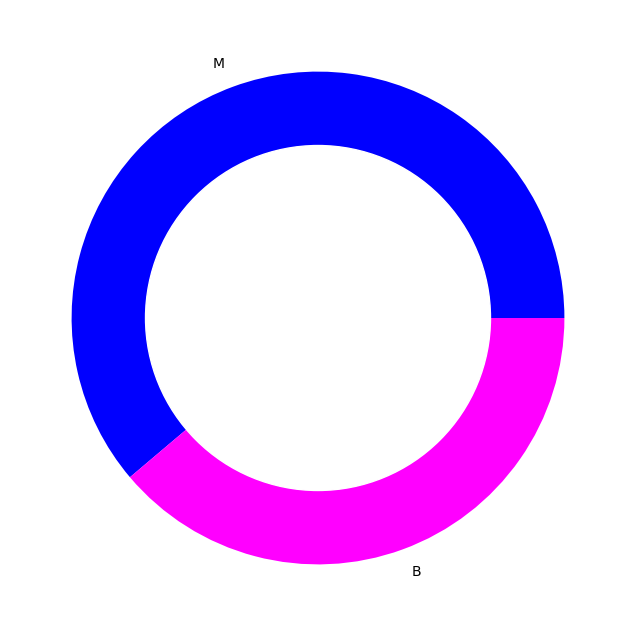

In [348]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [349]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = augmented_dataset[augmented_dataset['diagnosis_result'] == 'M']
data_2 = augmented_dataset[augmented_dataset['diagnosis_result'] == 'B']

data_2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
5,6,B,25.000000,25.000000,83.000000,477.000000,0.128000,0.170000,0.209000,0.076000
12,13,B,14.000000,15.000000,132.000000,1123.000000,0.097000,0.246000,0.240000,0.078000
19,20,B,17.000000,11.000000,87.000000,566.000000,0.098000,0.081000,0.189000,0.058000
20,21,B,16.000000,14.000000,86.000000,520.000000,0.108000,0.127000,0.197000,0.068000
...,...,...,...,...,...,...,...,...,...,...
1087,47,B,21.252138,14.443181,51.673726,241.468728,0.083867,0.048298,0.172401,0.068545
1088,69,B,13.311157,13.567335,58.815246,226.154704,0.109052,0.156955,0.216910,0.088122
1090,49,B,17.273692,25.601146,70.102585,481.497051,0.092239,0.099496,0.154590,0.065042
1091,49,B,17.598464,21.177526,76.337390,427.532530,0.115116,0.080107,0.158235,0.068906


In [350]:
augmented_dataset.shape

(1100, 10)

In [351]:
1100 / 2

550.0

In [352]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=550, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=550, 
                           random_state=123, replace=True)



print(data_1)
print(data_2_resample)

augmented_dataset = pd.concat([data_1_resample, data_2_resample])


augmented_dataset

      id diagnosis_result     radius    texture   perimeter         area   
0      1                M  23.000000  12.000000  151.000000   954.000000  \
2      3                M  21.000000  27.000000  130.000000  1203.000000   
3      4                M  14.000000  16.000000   78.000000   386.000000   
4      5                M   9.000000  19.000000  135.000000  1297.000000   
6      7                M  16.000000  26.000000  120.000000  1040.000000   
...   ..              ...        ...        ...         ...          ...   
1094  55                M  17.481721  27.339277   99.269963   729.935171   
1095   3                M  19.978855  31.185694  120.207886  1224.907812   
1096  23                M  15.600602  25.468872  101.613493   709.696559   
1098  54                M  17.257788  27.867176  122.879896  1064.264834   
1099  25                M   4.199506   8.503174  106.918385   848.587958   

      smoothness  compactness  symmetry  fractal_dimension  
0       0.143000     0.278

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
834,39,M,14.893676,12.353054,93.670688,694.800815,0.087172,0.034489,0.155451,0.063935
609,18,M,18.037403,10.229542,115.657314,880.735815,0.105350,0.198697,0.219111,0.067696
628,34,M,11.299492,22.280958,127.443657,1258.233196,0.109013,0.181453,0.166757,0.072343
532,92,M,6.592952,13.212822,92.193366,818.813552,0.094399,0.098585,0.164954,0.066178
159,86,M,10.398471,9.303707,115.598215,1113.484838,0.101616,0.123106,0.227774,0.065646
...,...,...,...,...,...,...,...,...,...,...
181,62,B,21.655981,10.818588,50.647974,192.048060,0.141771,0.108352,0.170231,0.067581
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
571,38,B,22.744891,13.505243,84.878895,561.530669,0.102497,0.042050,0.138111,0.055214
88,89,B,11.000000,11.000000,80.000000,466.000000,0.088000,0.094000,0.193000,0.064000


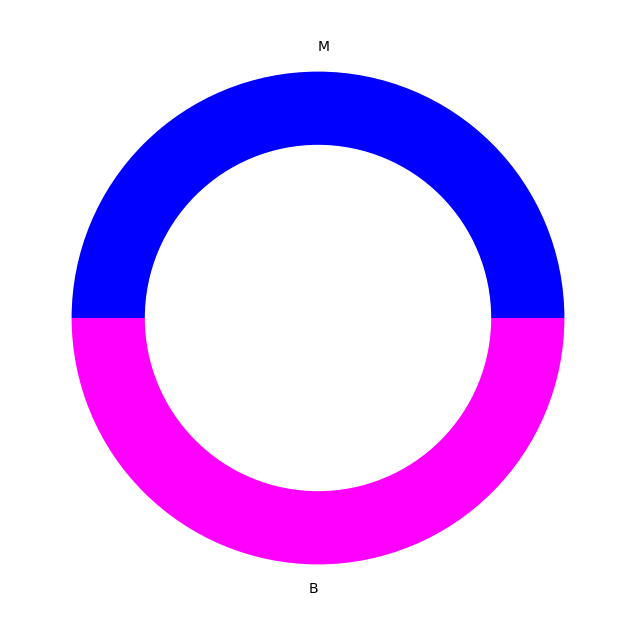

In [353]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [354]:
augmented_dataset['diagnosis_result'] = augmented_dataset['diagnosis_result'].replace({'M': 1, 'B': 0})


                   diagnosis_result
id                        -0.321935
diagnosis_result           1.000000
radius                    -0.116316
texture                    0.108635
perimeter                  0.617388
area                       0.596710
smoothness                 0.151809
compactness                0.515770
symmetry                   0.185664
fractal_dimension         -0.019228


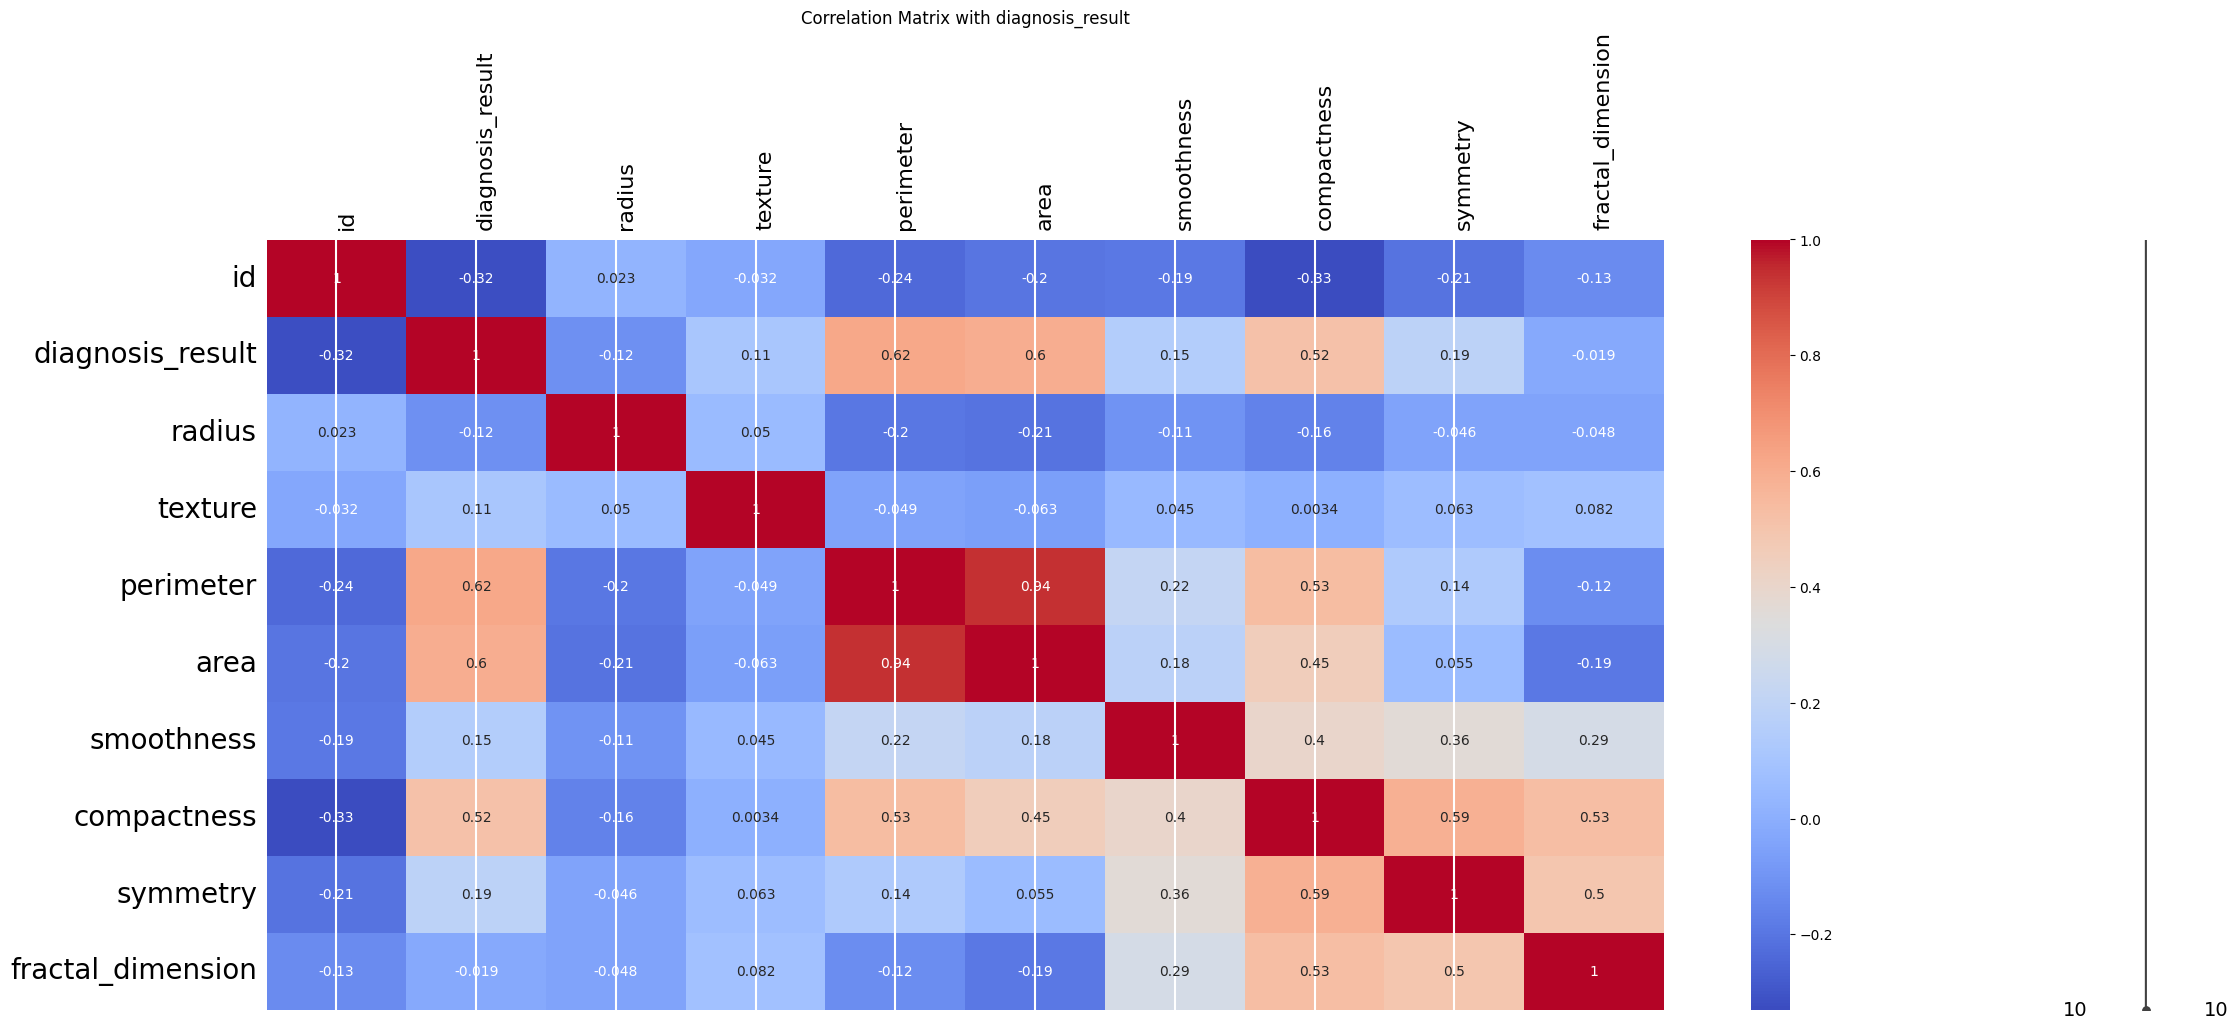

In [355]:
msno.matrix(augmented_dataset)

chosen_column = "diagnosis_result" 

# for col in augmented_dataset.columns:
#     if col != chosen_column:
#         plt.scatter(augmented_dataset[chosen_column], augmented_dataset[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = augmented_dataset.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [356]:
augmented_dataset.drop('compactness', axis=1, inplace=True)


In [357]:
# checking for some null, missing or NaN values
augmented_dataset.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

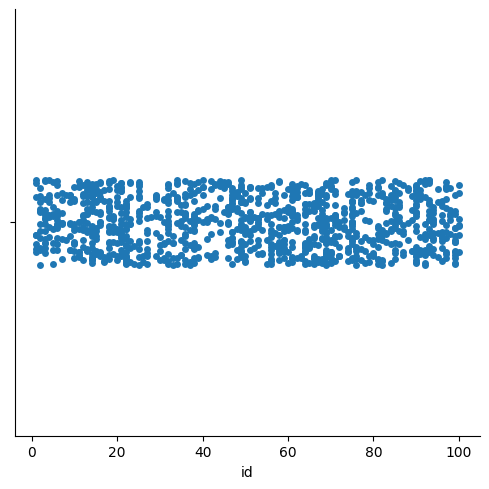

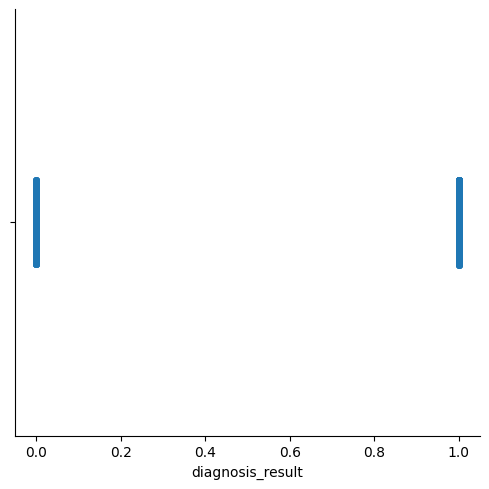

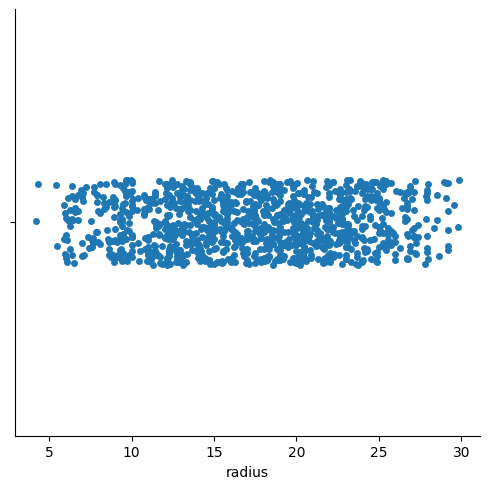

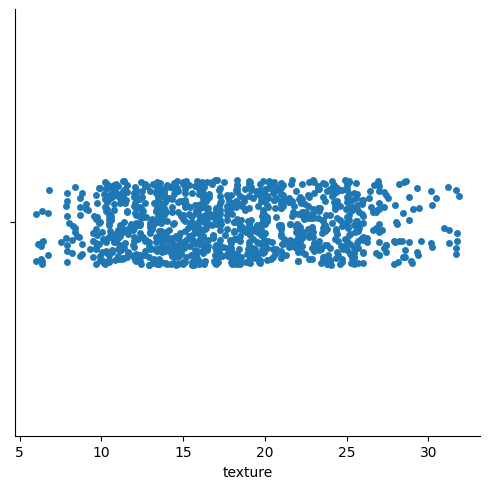

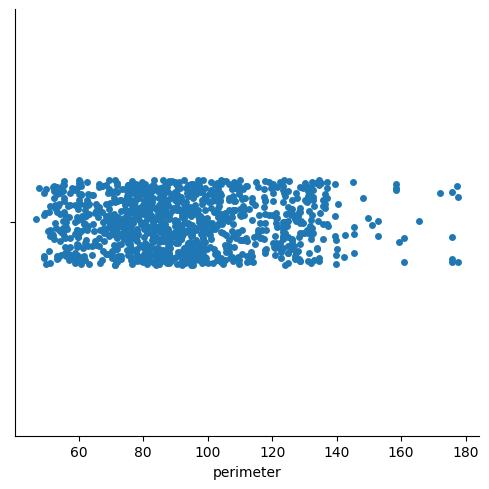

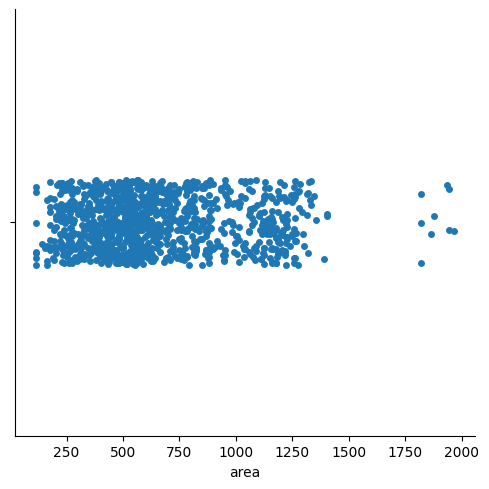

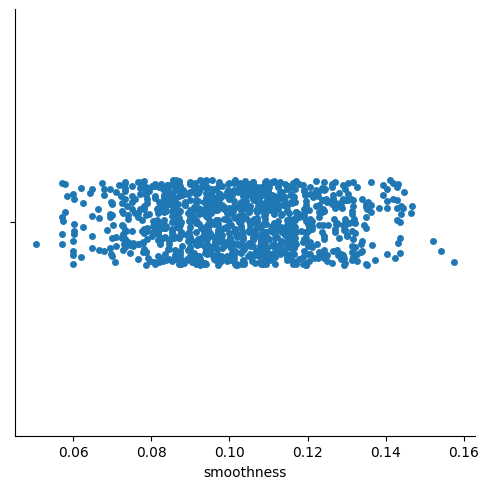

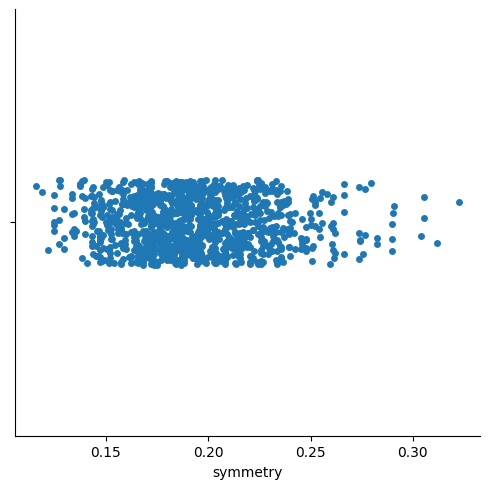

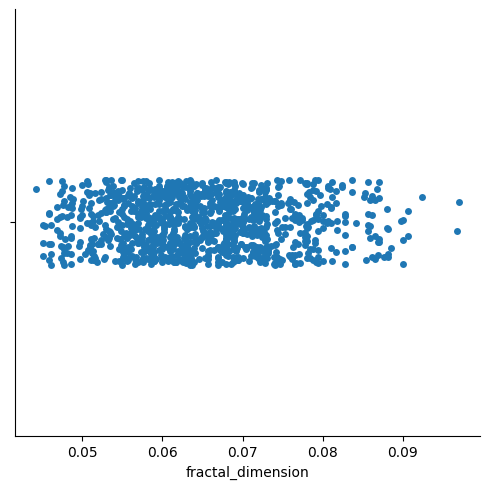

In [358]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in augmented_dataset.columns:
    sns.catplot(x = col, data = augmented_dataset)

In [359]:



ls = ["area", "smoothness", "symmetry", "fractal_dimension"]

for i in ls:
#     column_name = f'{i}'
    print(augmented_dataset[i].mean())
    print(augmented_dataset[i].std())
    new_column_name = f'{i}_zscore'
    augmented_dataset[new_column_name] = ( augmented_dataset[i] - augmented_dataset[i].mean() ) / augmented_dataset[i].std()
augmented_dataset.head()

649.1234397145769
316.98793675403186
0.1017269168841003
0.018317925882544224
0.19277018709248683
0.031697039342185485
0.06495724336272879
0.009575800443105895


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension,area_zscore,smoothness_zscore,symmetry_zscore,fractal_dimension_zscore
834,39,1,14.893676,12.353054,93.670688,694.800815,0.087172,0.155451,0.063935,0.144098,-0.794574,-1.177361,-0.106703
609,18,1,18.037403,10.229542,115.657314,880.735815,0.105350,0.219111,0.067696,0.730666,0.197791,0.831021,0.286050
628,34,1,11.299492,22.280958,127.443657,1258.233196,0.109013,0.166757,0.072343,1.921555,0.397758,-0.820691,0.771267
532,92,1,6.592952,13.212822,92.193366,818.813552,0.094399,0.164954,0.066178,0.535320,-0.400038,-0.877567,0.127461
159,86,1,10.398471,9.303707,115.598215,1113.484838,0.101616,0.227774,0.065646,1.464918,-0.006066,1.104340,0.071875


In [360]:
ls2 = ["area_zscore", "smoothness_zscore", "symmetry_zscore", "fractal_dimension_zscore"]

for i in ls2:
    print(augmented_dataset[augmented_dataset[i]>3])

     id  diagnosis_result     radius    texture   perimeter         area   
201  83                 1   5.432610  16.540730  165.427350  1966.105092  \
446  83                 1   9.851610  11.621621  177.750016  1945.462007   
446  83                 1   9.851610  11.621621  177.750016  1945.462007   
233  83                 1   9.052860  11.223520  175.625850  1936.336429   
911  83                 1  13.557507  12.317557  175.767950  1821.857060   
824  83                 1  14.054327  12.517292  177.453025  1863.305587   
911  83                 1  13.557507  12.317557  175.767950  1821.857060   
82   83                 1  10.000000  15.000000  172.000000  1878.000000   
911  83                 1  13.557507  12.317557  175.767950  1821.857060   

     smoothness  symmetry  fractal_dimension  area_zscore  smoothness_zscore   
201    0.093104  0.194330           0.071848     4.154674          -0.470751  \
446    0.114701  0.188606           0.069003     4.089552           0.708276   

In [361]:
 #data which have standard deviation high than 3 or lower -3 are always outliers. (sometimes it can be 2.3 or 2.5 also possible in place of 3, sometimes 4 is also possible, it depends on dataset)

for i in ls2:
    print(augmented_dataset[augmented_dataset[i]< -3])

Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []


In [362]:


for i in ls2:
    print(augmented_dataset[(augmented_dataset[i]<-3) | (augmented_dataset[i]>3)]) #This all are otliers

     id  diagnosis_result     radius    texture   perimeter         area   
201  83                 1   5.432610  16.540730  165.427350  1966.105092  \
446  83                 1   9.851610  11.621621  177.750016  1945.462007   
446  83                 1   9.851610  11.621621  177.750016  1945.462007   
233  83                 1   9.052860  11.223520  175.625850  1936.336429   
911  83                 1  13.557507  12.317557  175.767950  1821.857060   
824  83                 1  14.054327  12.517292  177.453025  1863.305587   
911  83                 1  13.557507  12.317557  175.767950  1821.857060   
82   83                 1  10.000000  15.000000  172.000000  1878.000000   
911  83                 1  13.557507  12.317557  175.767950  1821.857060   

     smoothness  symmetry  fractal_dimension  area_zscore  smoothness_zscore   
201    0.093104  0.194330           0.071848     4.154674          -0.470751  \
446    0.114701  0.188606           0.069003     4.089552           0.708276   

In [363]:
   
df2 = augmented_dataset[(augmented_dataset.area_zscore>-3) & (augmented_dataset.area_zscore<3) & (augmented_dataset.smoothness_zscore>-3) & (augmented_dataset.smoothness_zscore<3) & (augmented_dataset.symmetry_zscore>-3) & (augmented_dataset.symmetry_zscore<3) & (augmented_dataset.fractal_dimension_zscore>-3) & (augmented_dataset.fractal_dimension_zscore<3)]
df2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension,area_zscore,smoothness_zscore,symmetry_zscore,fractal_dimension_zscore
834,39,1,14.893676,12.353054,93.670688,694.800815,0.087172,0.155451,0.063935,0.144098,-0.794574,-1.177361,-0.106703
609,18,1,18.037403,10.229542,115.657314,880.735815,0.105350,0.219111,0.067696,0.730666,0.197791,0.831021,0.286050
628,34,1,11.299492,22.280958,127.443657,1258.233196,0.109013,0.166757,0.072343,1.921555,0.397758,-0.820691,0.771267
532,92,1,6.592952,13.212822,92.193366,818.813552,0.094399,0.164954,0.066178,0.535320,-0.400038,-0.877567,0.127461
159,86,1,10.398471,9.303707,115.598215,1113.484838,0.101616,0.227774,0.065646,1.464918,-0.006066,1.104340,0.071875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,62,0,21.655981,10.818588,50.647974,192.048060,0.141771,0.170231,0.067581,-1.441933,2.186083,-0.711088,0.273992
1,2,0,9.000000,13.000000,133.000000,1326.000000,0.143000,0.181000,0.057000,2.135339,2.253153,-0.371334,-0.830974
571,38,0,22.744891,13.505243,84.878895,561.530669,0.102497,0.138111,0.055214,-0.276328,0.042063,-1.724412,-1.017497
88,89,0,11.000000,11.000000,80.000000,466.000000,0.088000,0.193000,0.064000,-0.577698,-0.749371,0.007250,-0.099965


In [364]:
df2.shape

(1078, 13)

In [365]:
augmented_dataset.shape[0] - df2.shape[0]

22

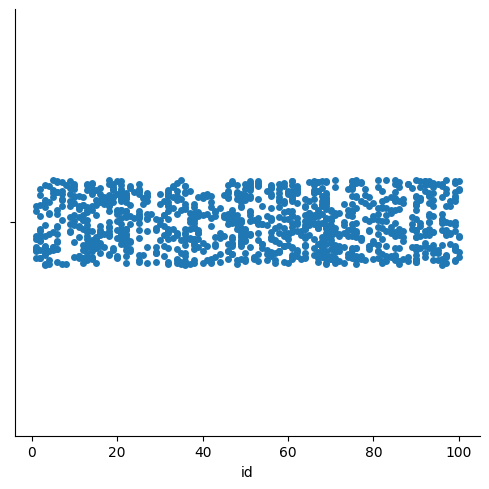

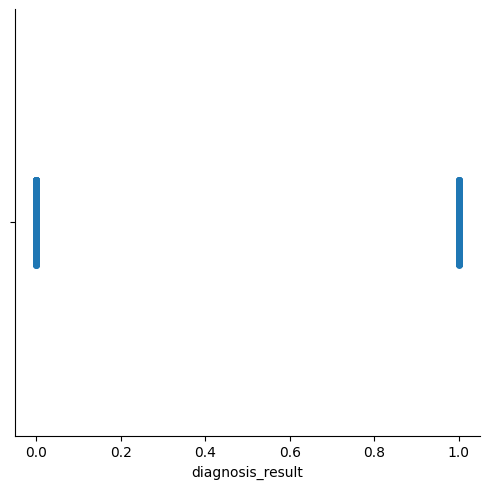

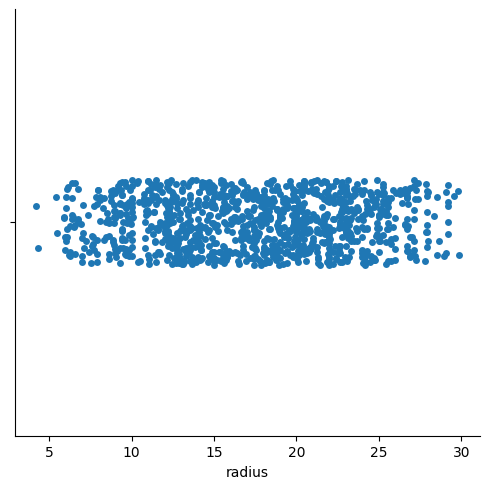

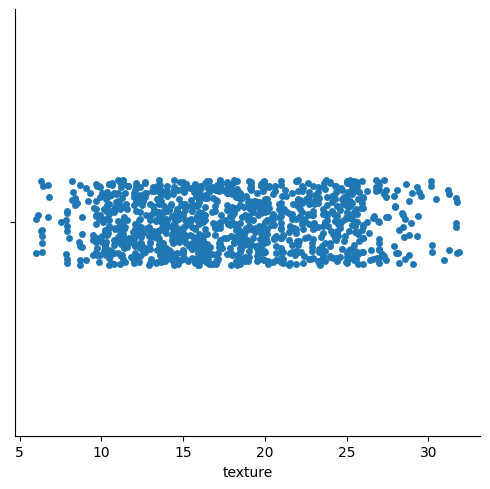

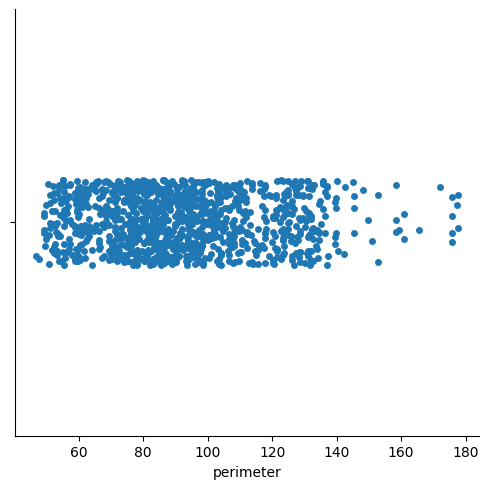

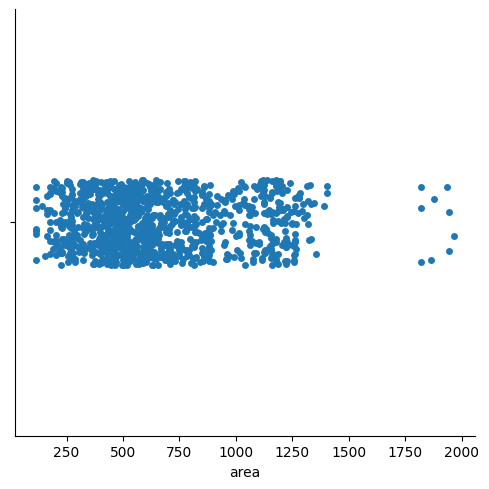

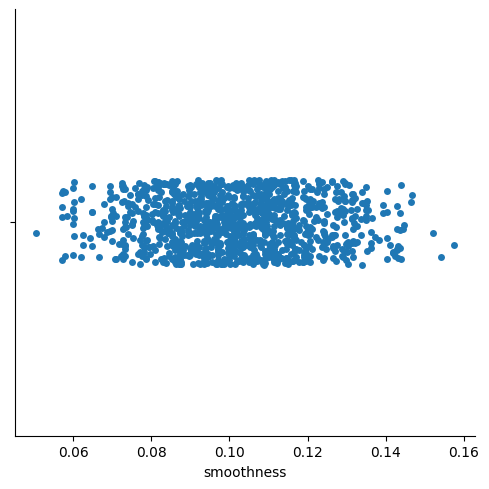

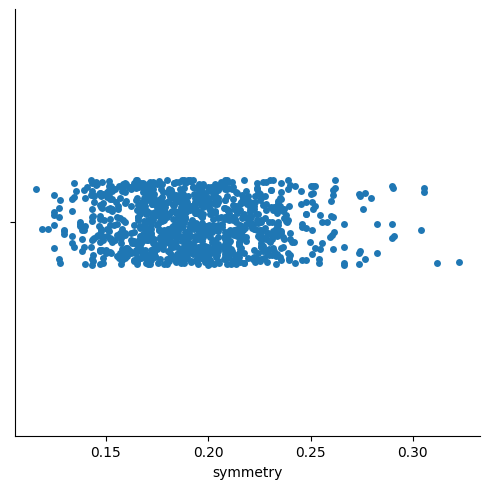

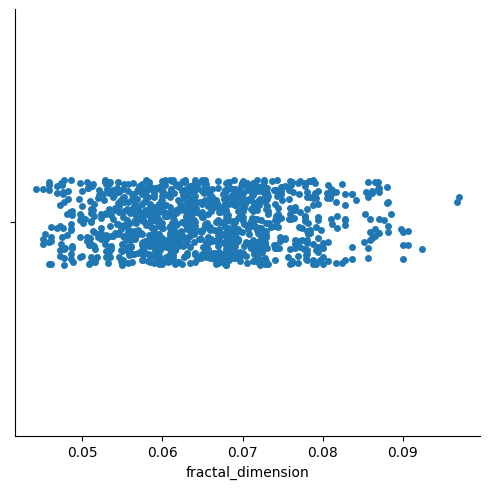

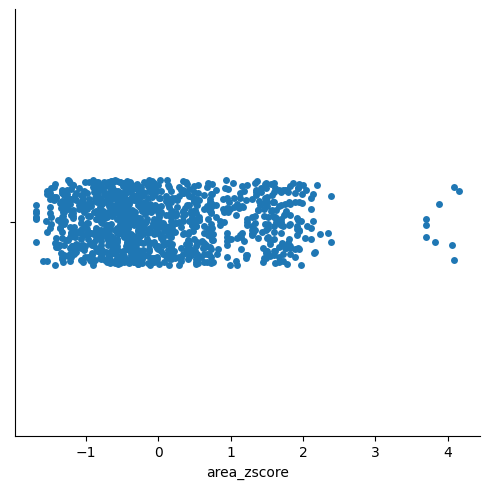

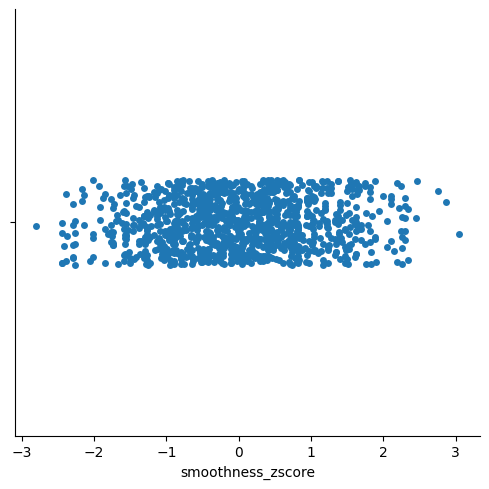

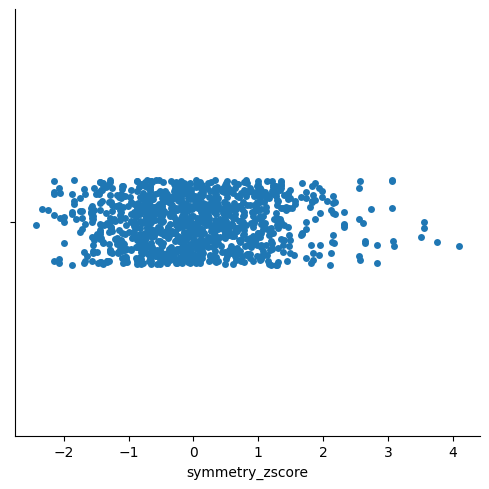

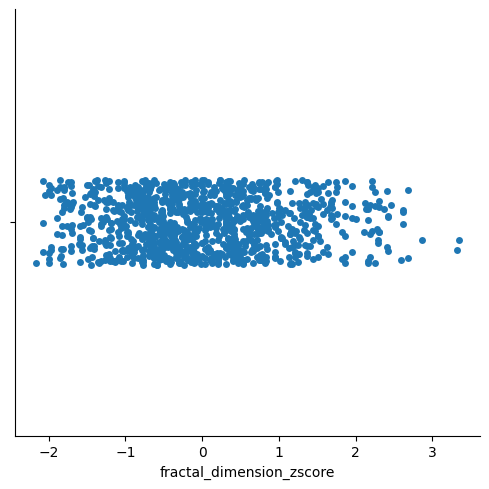

In [366]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in augmented_dataset.columns:
    sns.catplot(x = col, data = augmented_dataset)

In [367]:
del df2["area_zscore"]
del df2["smoothness_zscore"]
del df2["symmetry_zscore"]
del df2["fractal_dimension_zscore"]

In [368]:
### Independent and Dependent features
X=df2.iloc[:,2:]
y=df2.iloc[:,1]

In [369]:
X.head()

,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension
834,14.893676,12.353054,93.670688,694.800815,0.087172,0.155451,0.063935
609,18.037403,10.229542,115.657314,880.735815,0.105350,0.219111,0.067696
628,11.299492,22.280958,127.443657,1258.233196,0.109013,0.166757,0.072343
532,6.592952,13.212822,92.193366,818.813552,0.094399,0.164954,0.066178
159,10.398471,9.303707,115.598215,1113.484838,0.101616,0.227774,0.065646


In [370]:
y.head(20)

834     1
609     1
628     1
532     1
159     1
23      1
973     1
174     1
930     1
350     1
157     1
187     1
1044    1
70      1
119     1
888     1
365     1
184     1
681     1
561     1
Name: diagnosis_result, dtype: int64

In [371]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [372]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [373]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [374]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [375]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [376]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [377]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [378]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [379]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = classifier.predict(X_test)

In [380]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [381]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 83.33333333333334
K Nearest neighbors: 84.5679012345679
Support Vector Classifier: 83.33333333333334
Naive Bayes: 83.33333333333334
Decision tree: 92.28395061728395
Random Forest: 95.67901234567901


In [382]:
### Create a Pickle file using serialization 

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(logreg, pickle_out)
pickle_out.close()